<a href="https://colab.research.google.com/github/faisu6339-glitch/Machine-learning/blob/main/Ridge_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ridge Regression in Machine Learning

Ridge Regression is a regularized linear regression model that helps to prevent overfitting and improve the model's generalization ability, especially when dealing with multicollinearity (highly correlated features) in the dataset. Here's a breakdown:

*   **Regularization:** Ridge Regression adds a penalty term to the ordinary least squares (OLS) cost function. This penalty term is the sum of the squares of the regression coefficients (L2 regularization).

*   **Cost Function:** The objective function for Ridge Regression is:
    `Cost = Sum of Squared Residuals + λ * (Sum of Squared Coefficients)`
    Where `λ` (lambda) is the regularization parameter, a non-negative value that controls the strength of the penalty.

*   **How it Works:**
    *   **Shrinks Coefficients:** The L2 penalty forces the regression coefficients to shrink towards zero. While it doesn't force coefficients to be exactly zero (unlike Lasso Regression), it reduces their magnitude.
    *   **Handles Multicollinearity:** By shrinking coefficients, Ridge Regression can effectively mitigate the problem of multicollinearity, which can lead to unstable and high-variance OLS estimates.
    *   **Bias-Variance Trade-off:** Increasing `λ` increases the bias of the model but decreases its variance. The goal is to find an optimal `λ` that balances this trade-off for better predictive performance on unseen data.

*   **Benefits:**
    *   Reduces overfitting.
    *   Improves model stability and generalization.
    *   Effective in situations with many correlated predictors.

## Overfitting in Linear Regression

Overfitting in linear regression occurs when your model learns the training data too well, capturing not only the underlying patterns but also the noise and random fluctuations present in that specific dataset. This results in a model that performs very well on the training data but poorly on unseen, new data.

Here's a breakdown:

*   **What it looks like:** Imagine fitting a very complex curve to a few data points. While the curve might pass perfectly through every training point, it's likely to be highly sensitive to slight variations, making it a poor predictor for new points.

*   **Causes:**
    *   **Too complex a model for the data:** Using too many features or polynomial terms when the true relationship is simpler.
    *   **Insufficient training data:** If you don't have enough data, the model might just memorize the existing points.
    *   **High variance:** The model captures too much noise, leading to high variability in predictions for new data.

*   **Consequences:**
    *   **Poor generalization:** The primary issue is that the model fails to generalize well to new, unseen data, which is its ultimate purpose.
    *   **Unreliable predictions:** Predictions made by an overfit model are often inaccurate and inconsistent.

*   **How to detect it:**
    *   **Performance gap:** A significant difference between the model's performance on the training set (high accuracy/low error) and its performance on a validation or test set (low accuracy/high error).
    *   **Visualization:** Plotting the model's predictions and seeing if it follows every tiny fluctuation in the training data rather than the general trend.

*   **How to prevent/mitigate it:**
    *   **More data:** Increase the size and diversity of your training dataset.
    *   **Feature selection/engineering:** Choose relevant features and remove irrelevant or redundant ones.
    *   **Regularization techniques:** Methods like Ridge and Lasso regression add a penalty to the model's complexity, discouraging large coefficients and thus reducing overfitting. (We just demonstrated Ridge Regression!)
    *   **Cross-validation:** Use techniques like k-fold cross-validation to get a more robust estimate of model performance on unseen data.
    *   **Simplify the model:** Reduce the number of features or the complexity of the polynomial terms.

## Underfitting in Machine Learning

Underfitting is a common problem in machine learning where a model is too simple to capture the underlying patterns in the training data. This results in poor performance on both the training data and new, unseen data. In essence, the model hasn't learned enough from the training data to make accurate predictions.

Here's a breakdown:

*   **What it looks like:** Imagine trying to fit a straight line to data that clearly follows a curved pattern. The line (your simple model) won't capture the curve, resulting in large errors on most data points.

*   **Causes:**
    *   **Too simple a model:** Using a model that lacks the complexity to represent the true relationship between features and the target variable (e.g., using linear regression for non-linear data).
    *   **Insufficient features:** Not providing the model with enough relevant information (features) to learn from.
    *   **Insufficient training time/epochs:** For iterative models (like neural networks), stopping training too early can lead to underfitting.
    *   **Too much regularization:** While regularization helps prevent overfitting, an excessively strong penalty can force coefficients to be too small, leading to underfitting.

*   **Consequences:**
    *   **Poor performance on training data:** The model fails to achieve a good fit even on the data it was trained on.
    *   **Poor generalization:** Since the model hasn't learned the basic patterns, it will also perform poorly on new, unseen data.
    *   **High bias:** The model makes strong assumptions about the data, which leads to consistent errors.

*   **How to detect it:**
    *   **Low training accuracy/high training error:** If your model performs poorly on the training set, it's a strong indicator of underfitting.
    *   **Similar performance on training and test sets (both low):** Unlike overfitting, where there's a significant gap, an underfit model will perform poorly on both.

*   **How to prevent/mitigate it:**
    *   **Increase model complexity:** Use a more complex model (e.g., polynomial regression instead of linear, or a more complex neural network architecture).
    *   **Add more features:** Include more relevant features that might help the model understand the data better.
    *   **Reduce regularization:** If regularization was applied, try reducing the strength of the regularization parameter.
    *   **Increase training time/epochs:** For iterative models, allow more training iterations.
    *   **Remove noise:** If the data is excessively noisy, try cleaning it to reveal underlying patterns more clearly.

### 1. Generate Synthetic Data

First, let's create some synthetic data to demonstrate Ridge Regression. We'll add some noise to make it more realistic.

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 3*X.squeeze() + np.random.randn(100) * 5


In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

lr = LinearRegression()
ridge = Ridge(alpha=10)

lr.fit(X_train, y_train)
ridge.fit(X_train, y_train)


Ridge(alpha=10)

In [35]:
print("Linear Coef:", lr.coef_)
print("Ridge Coef :", ridge.coef_)


Linear Coef: [3.06478609]
Ridge Coef : [3.01437766]


### 4. Visualize Predictions vs. Actual Values

Let's plot the predicted values against the actual values to see how well the model performed.

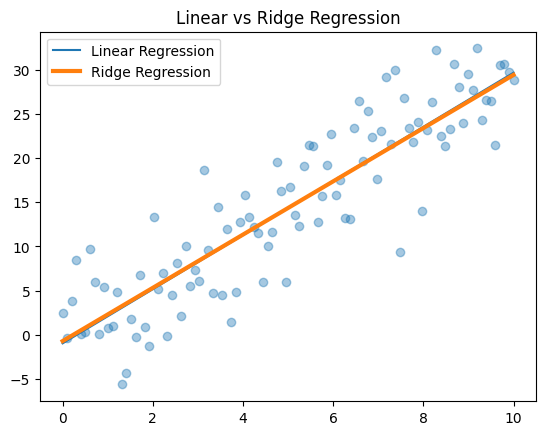

In [36]:
plt.scatter(X, y, alpha=0.4)
plt.plot(X, lr.predict(X), label="Linear Regression")
plt.plot(X, ridge.predict(X), label="Ridge Regression", linewidth=3)
plt.legend()
plt.title("Linear vs Ridge Regression")
plt.show()


In [37]:
print("Linear Test MSE:",
      mean_squared_error(y_test, lr.predict(X_test)))

print("Ridge Test MSE:",
      mean_squared_error(y_test, ridge.predict(X_test)))


Linear Test MSE: 13.871578462164736
Ridge Test MSE: 13.899914918314616


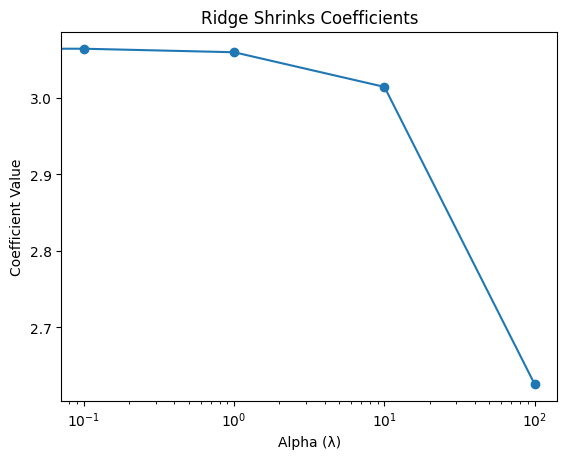

In [38]:
alphas = [0, 0.1, 1, 10, 100]
coefs = []

for a in alphas:
    r = Ridge(alpha=a)
    r.fit(X_train, y_train)
    coefs.append(r.coef_[0])

plt.plot(alphas, coefs, marker='o')
plt.xscale("log")
plt.xlabel("Alpha (λ)")
plt.ylabel("Coefficient Value")
plt.title("Ridge Shrinks Coefficients")
plt.show()


# Task
Create synthetic data with a non-linear relationship (polynomial with noise), then train three models of varying complexity: an underfit linear model, a well-fit polynomial model, and an overfit high-degree polynomial model. Finally, visualize these models' predictions against the synthetic data to demonstrate underfitting, good fit, and overfitting, and explain the insights from the visualizations.

## Generate Synthetic Data

### Subtask:
Create synthetic data with a non-linear relationship to clearly demonstrate underfitting and overfitting.


**Reasoning**:
Generate synthetic data with a non-linear relationship and split it into training and testing sets as per the instructions.



In [39]:
np.random.seed(42)
X_nonlinear = np.linspace(-5, 5, 100).reshape(-1, 1)
y_nonlinear = 0.5 * X_nonlinear**3 - 2 * X_nonlinear**2 + X_nonlinear + 5 + np.random.randn(100, 1) * 5

X_train_nonlinear, X_test_nonlinear, y_train_nonlinear, y_test_nonlinear = train_test_split(
    X_nonlinear, y_nonlinear, test_size=0.2, random_state=42
)

print("X_nonlinear shape:", X_nonlinear.shape)
print("y_nonlinear shape:", y_nonlinear.shape)
print("X_train_nonlinear shape:", X_train_nonlinear.shape)
print("X_test_nonlinear shape:", X_test_nonlinear.shape)

X_nonlinear shape: (100, 1)
y_nonlinear shape: (100, 1)
X_train_nonlinear shape: (80, 1)
X_test_nonlinear shape: (20, 1)


## Train Models with Varying Complexity

### Subtask:
Train three different models: an underfit linear regression model, a well-fit polynomial regression model, and an overfit high-degree polynomial regression model.


**Reasoning**:
The subtask requires training three models with varying complexity. I need to import `PolynomialFeatures` for generating polynomial features, then create instances of `LinearRegression` and `PolynomialFeatures` for different degrees (linear, well-fit polynomial, and overfit polynomial). Finally, I will train each model on the respective feature sets.



In [40]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# 1. Underfit Model (Linear Regression)
model_underfit = LinearRegression()
model_underfit.fit(X_train_nonlinear, y_train_nonlinear)

# 2. Well-fit Model (Polynomial Regression - Degree 3)
poly_well_fit = PolynomialFeatures(degree=3)
X_train_poly_well_fit = poly_well_fit.fit_transform(X_train_nonlinear)
model_well_fit = LinearRegression()
model_well_fit.fit(X_train_poly_well_fit, y_train_nonlinear)

# 3. Overfit Model (Polynomial Regression - Degree 15)
poly_overfit = PolynomialFeatures(degree=15)
X_train_poly_overfit = poly_overfit.fit_transform(X_train_nonlinear)
model_overfit = LinearRegression()
model_overfit.fit(X_train_poly_overfit, y_train_nonlinear)

print("Models trained successfully.")

Models trained successfully.


## Visualize Overfitting and Underfitting

### Subtask:
Plot the original synthetic data, and then overlay the predictions from the underfit, well-fit, and overfit models to visualize underfitting, good fit, and overfitting.


**Reasoning**:
To visualize the models' predictions against the synthetic data, I need to first create a sorted input array, generate predictions for each model using the appropriate polynomial transformations, and then plot the original data with the overlaid predictions, complete with labels, a legend, and a title.



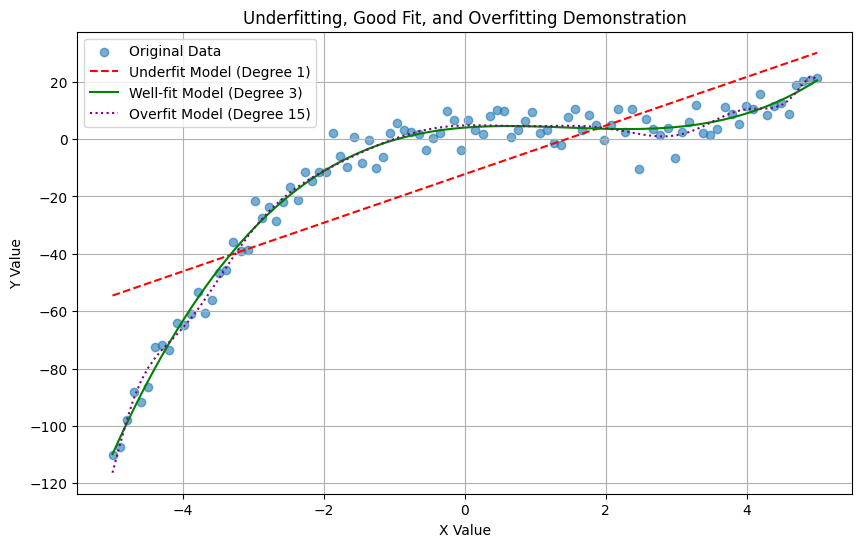

In [41]:
import matplotlib.pyplot as plt

# 1. Create a sorted version of X_nonlinear for smooth prediction lines
X_sorted = np.sort(X_nonlinear, axis=0)

# 2. Generate predictions from the underfit model
y_pred_underfit = model_underfit.predict(X_sorted)

# 3. Generate predictions from the well-fit model
X_sorted_poly_well_fit = poly_well_fit.transform(X_sorted)
y_pred_well_fit = model_well_fit.predict(X_sorted_poly_well_fit)

# 4. Generate predictions from the overfit model
X_sorted_poly_overfit = poly_overfit.transform(X_sorted)
y_pred_overfit = model_overfit.predict(X_sorted_poly_overfit)

# 5. Create a scatter plot of the original synthetic data
plt.figure(figsize=(10, 6))
plt.scatter(X_nonlinear, y_nonlinear, label='Original Data', alpha=0.6)

# 6. On the same plot, add line plots for the predictions of each model
plt.plot(X_sorted, y_pred_underfit, color='red', linestyle='--', label='Underfit Model (Degree 1)')
plt.plot(X_sorted, y_pred_well_fit, color='green', linestyle='-', label='Well-fit Model (Degree 3)')
plt.plot(X_sorted, y_pred_overfit, color='purple', linestyle=':', label='Overfit Model (Degree 15)')

# 7. Add a legend to the plot
plt.legend()

# 8. Add a title to the plot
plt.title('Underfitting, Good Fit, and Overfitting Demonstration')

# 9. Label the x-axis and y-axis
plt.xlabel('X Value')
plt.ylabel('Y Value')

# 10. Display the plot
plt.grid(True)
plt.show()

### Insights from the Visualization

The plot clearly illustrates the concepts of underfitting, good fit, and overfitting:

*   **Underfit Model (Linear Regression, Degree 1):** The red dashed line represents the linear model. It is too simple to capture the non-linear pattern of the synthetic data. It fails to follow the curve, resulting in consistently high errors across the data points. This demonstrates **underfitting**, where the model has high bias and cannot learn the underlying relationship.

*   **Well-fit Model (Polynomial Regression, Degree 3):** The green solid line, representing the degree 3 polynomial model, closely follows the general trend of the original data. It captures the non-linear relationship without being overly sensitive to individual data points or noise. This indicates a **good fit**, where the model effectively balances bias and variance, performing well on both training and potentially unseen data.

*   **Overfit Model (Polynomial Regression, Degree 15):** The purple dotted line, from the degree 15 polynomial model, passes through or very close to almost every training data point. While it performs exceptionally well on the training data, its highly erratic behavior between data points suggests that it has learned the noise along with the underlying pattern. This is a classic example of **overfitting**, indicating high variance. Such a model would generalize poorly to new, unseen data, as it would be highly sensitive to slight variations not present in the training set.

## Final Task

### Subtask:
Summarize the visualizations and explain how they demonstrate the concepts of underfitting and overfitting.


## Summary:

### Data Analysis Key Findings

*   **Synthetic Data Generation:** A dataset of 100 points with a non-linear, cubic relationship (`y = 0.5 * X^3 - 2 * X^2 + X + 5` with added noise) was successfully created and split into 80 training and 20 testing samples.
*   **Model Training:** Three distinct models were trained on the synthetic data:
    *   An **underfit** linear regression model (Degree 1).
    *   A **well-fit** polynomial regression model (Degree 3), which matches the underlying data generation process.
    *   An **overfit** high-degree polynomial regression model (Degree 15).
*   **Visualization of Underfitting:** The linear model (red dashed line) was too simple to capture the non-linear pattern, resulting in a poor fit with consistently high errors across the data, indicating high bias.
*   **Visualization of Good Fit:** The degree 3 polynomial model (green solid line) closely followed the general trend of the original data, successfully capturing the non-linear relationship without being overly sensitive to noise, demonstrating a good balance between bias and variance.
*   **Visualization of Overfitting:** The degree 15 polynomial model (purple dotted line) passed through almost every training data point but exhibited highly erratic behavior between points, indicating it learned the noise in the training data and would generalize poorly to new data due to high variance.

### Insights or Next Steps

*   The visualization powerfully illustrates that model complexity directly correlates with the risk of underfitting or overfitting. An appropriately complex model (like the degree 3 polynomial here) is essential for capturing underlying data patterns without being misled by noise.
*   To quantitatively evaluate model performance and identify the optimal complexity, future steps could involve calculating and comparing performance metrics (e.g., Mean Squared Error) on both training and test sets for each model, and exploring techniques like cross-validation for more robust model selection.


#Program 2

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

np.random.seed(42)
X = np.linspace(-3, 3, 80).reshape(-1, 1)
y = np.sin(X) + np.random.normal(0, 0.3, X.shape)


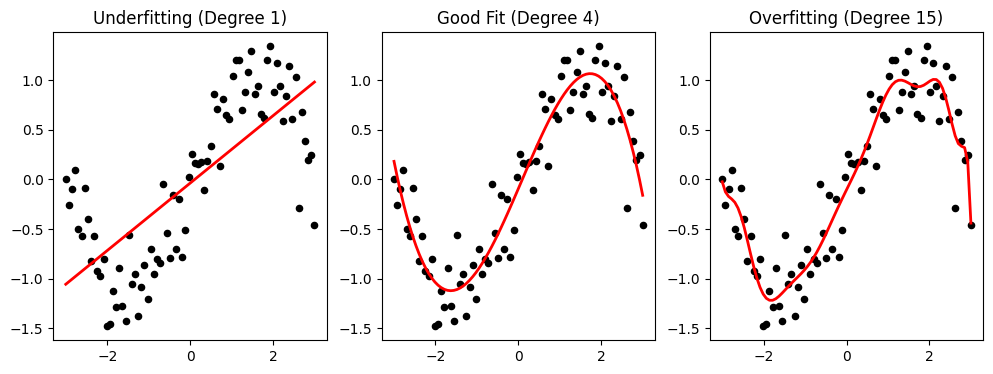

In [43]:
degrees = [1, 4, 15]
labels = ["Underfitting", "Good Fit", "Overfitting"]

plt.figure(figsize=(12, 4))

for i, (d, label) in enumerate(zip(degrees, labels), 1):
    model = Pipeline([
        ("poly", PolynomialFeatures(degree=d)),
        ("lr", LinearRegression())
    ])
    model.fit(X, y)
    y_pred = model.predict(X)

    plt.subplot(1, 3, i)
    plt.scatter(X, y, color="black", s=20)
    plt.plot(X, y_pred, color="red", linewidth=2)
    plt.title(label + f" (Degree {d})")


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

train_error = []
test_error = []

for d in range(1, 20):
    model = Pipeline([
        ("poly", PolynomialFeatures(degree=d)),
        ("lr", LinearRegression())
    ])
    model.fit(X_train, y_train)
    train_error.append(mean_squared_error(y_train, model.predict(X_train)))
    test_error.append(mean_squared_error(y_test, model.predict(X_test)))


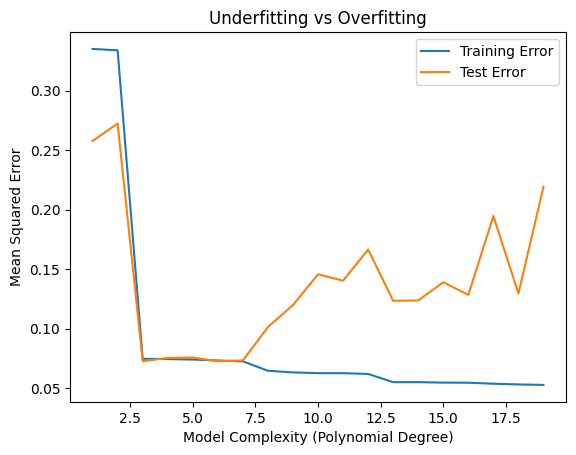

In [45]:
plt.plot(range(1, 20), train_error, label="Training Error")
plt.plot(range(1, 20), test_error, label="Test Error")
plt.xlabel("Model Complexity (Polynomial Degree)")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Underfitting vs Overfitting")
plt.show()


#Program 3

In [46]:
from sklearn.datasets import load_diabetes
data=load_diabetes()

In [47]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [48]:
X=data.data
y=data.target

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [50]:
L=LinearRegression()
L.fit(X_train,y_train)

LinearRegression()

In [51]:
y_pred=L.predict(X_test)

In [52]:
from sklearn.metrics import mean_squared_error,r2_score
print("R2 score",r2_score(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.4526027629719195
MSE 2900.193628493482
RMSE 53.85344583676593


In [53]:
from sklearn.linear_model import Ridge
R=Ridge(alpha=0.5)
R.fit(X_train,y_train)

Ridge(alpha=0.5)

In [54]:
y_pred1=R.predict(X_test)

In [55]:
print("R2 score",r2_score(y_test,y_pred1))
print("MSE",mean_squared_error(y_test,y_pred1))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred1)))

R2 score 0.4493973121295206
MSE 2917.176593478921
RMSE 54.01089328532644


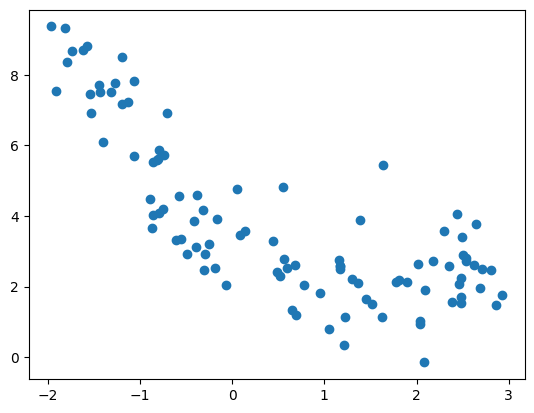

In [56]:
m=100
x1= 5 * np.random.rand(m, 1)-2
x2=0.7 * x1 ** 2-2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1,x2)
plt.show()

In [57]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

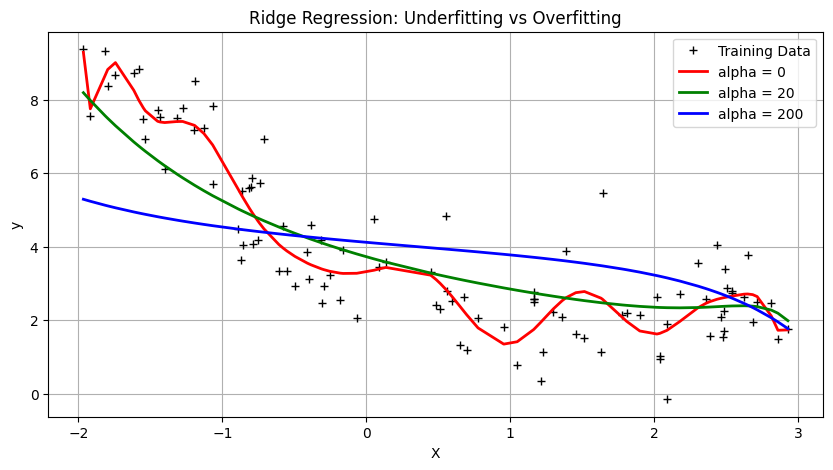

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge

# Function to get predictions
def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ("poly", PolynomialFeatures(degree=16)),
        ("std_scaler", StandardScaler()),
        ("ridge", Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)



alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 5))
plt.plot(x1, x2, 'k+', label="Training Data")

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)

    # sort for smooth curve
    sorted_idx = np.argsort(x1.ravel())
    plt.plot(
        x1.ravel()[sorted_idx],
        preds.ravel()[sorted_idx],
        c=c,
        linewidth=2,
        label=f"alpha = {alpha}"
    )

plt.xlabel("X")
plt.ylabel("y")
plt.title("Ridge Regression: Underfitting vs Overfitting")
plt.legend()
plt.grid(True)
plt.show()
